## PROBLEM STATEMENT: To perform classification analysis on Iris dataset. Perform Logistic Regression & Support Vector Machine (SVM) algorithms and compare the accuracy.

#Loading and Understanding the Dataset

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
sns.set(style="white", color_codes=True)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
print(os.listdir("/content/"))

['.config', 'Iris (1).csv', 'sample_data']


In [ ]:
iris = pd.read_csv("/content/Iris (1).csv")

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#Analysing the Data Visually

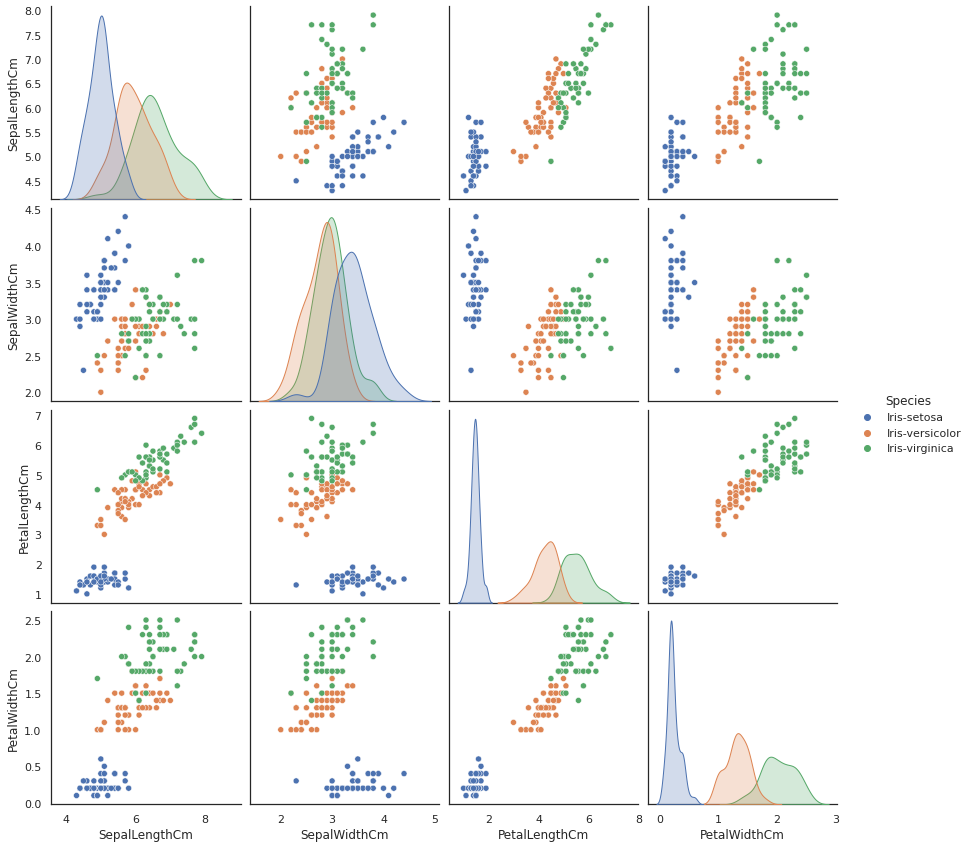

In [ ]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3)

#Dividing the Data for Training and Testing

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.iloc[:, :-1].values
y = iris.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Training the Model

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


###SVM(Support Vector Machines)

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC()
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 1.0


#Comparing the Accuracy

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
 classification_models = []

In [ ]:
classification_models.append(('Logistic Regression', LogisticRegression(solver="liblinear")))

In [ ]:
classification_models.append(('Kernel SVM', SVC(kernel = 'rbf',gamma='scale')))

In [ ]:
for name, model in classification_models:
  kfold = KFold(n_splits=10, random_state=0)
  result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
  print("%s: Mean Accuracy = %.2f%% - SD Accuracy = %.2f%%" % (name, result.mean()*100, result.std()*100))



Logistic Regression: Mean Accuracy = 86.67% - SD Accuracy = 23.66%
Kernel SVM: Mean Accuracy = 94.00% - SD Accuracy = 7.57%
